In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from scipy import linalg
import numpy as np

In [2]:
def CreateTriangleLocations(n):
    u = np.linspace(-1,1,n)
    x,y = np.meshgrid(u,u)
    x = x.flatten(); y = y.flatten()
    ind = np.where(x<(-y)+2/n/10)
    return x[ind],y[ind]

def PrimeBasis(x,y): return np.asarray([x**0,x,y,x*y,x*x,y*y])

Create nodal locations and evaluate the Vandermonde matrix.

In [3]:
xn,yn = CreateTriangleLocations(3)
V = PrimeBasis(xn,yn)

Transform the prime basis evaluated at a fine sampling of points into the nodal basis and plot.

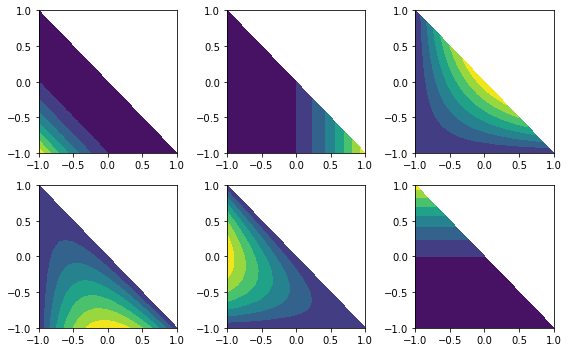

In [4]:
xp,yp = CreateTriangleLocations(21)
P = PrimeBasis(xp,yp)
N = np.linalg.inv(V) @ P # transform to nodal basis
T = tri.Triangulation(xp,yp)
fig,ax = plt.subplots(figsize=(8,5),nrows=2,ncols=3,tight_layout=True)
for i in range(3):
    for j in range(2):
        k = 2*i+j
        ax[j,i].tricontourf(T,N[k],vmin=N.min(),vmax=N.max())

Build a constraint matrix by integrating each of the prime basis functions along the bottom edge, multiplied by the 2nd and 3rd Legendre polynomials in order to keep the $\{1,x\}$ terms.

$C_{0,i} = \int_{-1}^{+1} P_i(x,-1) (x) dx$

$C_{1,i} = \int_{-1}^{+1} P_i(x,-1) \frac{1}{2}(3x^2-1) dx$

In [5]:
xg,wg = np.polynomial.legendre.leggauss(3)
leg2 = xg
leg3 = 0.5*(3*xg**2-1)
L = np.asarray([(PrimeBasis(xg,np.ones(xg.size)*-1) * (leg2*wg)[np.newaxis,:]).sum(axis=1),
                (PrimeBasis(xg,np.ones(xg.size)*-1) * (leg3*wg)[np.newaxis,:]).sum(axis=1)])
UL,SL,VL = linalg.svd(L) # will end up using LQ
VL = VL.T[:,1:]          # line above eq (9)

In [6]:
xnr = xn[[0,2,3,4,5]]
ynr = yn[[0,2,3,4,5]]
Vr = VL.T @ PrimeBasis(xnr,ynr) # reduced space Vandermonde matrix
Nr = np.linalg.inv(Vr) @ VL.T @ PrimeBasis(xp,yp) # P --> Pr --> Nr, nodal reduced basis

Nr[0] min = -9.007199e+15 max = 2.678987e+00
Nr[1] min = -3.008987e+00 max = 9.007199e+15
Nr[2] min = -1.000000e+00 max = 1.000000e+00
Nr[3] min = -2.516055e-15 max = 6.958369e+00
Nr[4] min = -5.000000e-01 max = 1.000000e+00


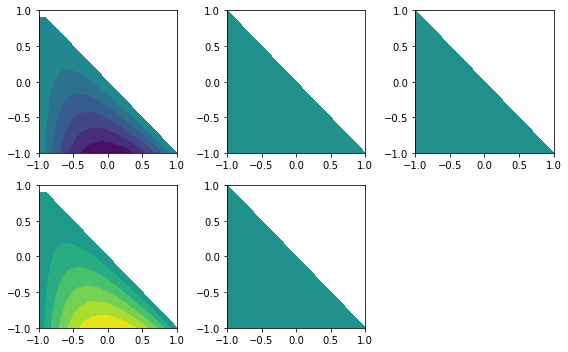

In [7]:
fig,ax = plt.subplots(figsize=(8,5),nrows=2,ncols=3,tight_layout=True)
for i in range(3):
    for j in range(2):
        k = 2*i+j
        if k == 5: 
            ax[j,i].axis('off')
            continue
        print("Nr[%d] min = %e max = %e" % (k,Nr[k].min(),Nr[k].max()))
        ax[j,i].tricontourf(T,Nr[k],vmin=Nr.min(),vmax=Nr.max())